In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# load data for sensor value fault
with open("log_exp_svf_re_re3.pkl", "rb") as f:
    data = pickle.load(f)



In [30]:
print(len(data[0]), len(data[1]), len(data[2]), len(data[3]))

0 131 0 32


In [31]:
data_format = ('payload', 'board_id', 'pkt_no', 'RSSI', 'Tx_time', 'reTx_time', 'rx_time' )

In [32]:
### Number of Packets received by primary board and redundant board
print('Primary Board:', len(data[1]))
print('Redundant Board:', len(data[3]))


Primary Board: 131
Redundant Board: 32


In [33]:
### check if all packets belong to same board
### PB
pb_id = 0
rb_id = 0
for d_i, d in enumerate(data[1]):
    if d_i == 0:
        pb_id = d[1]
        print('PB Id:',pb_id) 
    assert(data[1][0][1]==d[1])
### RB
for d_i, d in enumerate(data[3]):
    if d_i == 0:
        rb_id = d[1]
        print('RB Id:', rb_id)
    assert(data[3][0][1]==d[1])

PB Id: 94420780
RB Id: 3903892222


In [7]:
### analyze PB data
for d in data[1]:
    print(d[1:])
    #print(d[0][0])
    
    

(94420780, 0, -92, 25, 25, [2023, 3, 7, 2, 33, 12])
(94420780, 0, -96, 25, 32, [2023, 3, 7, 2, 33, 19])
(94420780, 0, -96, 25, 38, [2023, 3, 7, 2, 33, 26])
(94420780, 1, -98, 48, 48, [2023, 3, 7, 2, 33, 35])
(94420780, 1, -97, 48, 54, [2023, 3, 7, 2, 33, 42])
(94420780, 1, -94, 48, 61, [2023, 3, 7, 2, 33, 48])
(94420780, 2, -34, 71, 77, [2023, 3, 7, 2, 34, 4])
(94420780, 2, -99, 71, 84, [2023, 3, 7, 2, 34, 11])
(94420780, 3, -94, 93, 93, [2023, 3, 7, 2, 34, 21])
(94420780, 3, -122, 93, 100, [2023, 3, 7, 2, 34, 27])
(94420780, 3, -92, 93, 106, [2023, 3, 7, 2, 34, 34])
(94420780, 4, -96, 122, 122, [2023, 3, 7, 2, 34, 50])
(94420780, 4, -92, 122, 129, [2023, 3, 7, 2, 34, 56])
(94420780, 4, -94, 122, 135, [2023, 3, 7, 2, 35, 3])
(94420780, 5, -95, 151, 151, [2023, 3, 7, 2, 35, 19])
(94420780, 5, -96, 151, 158, [2023, 3, 7, 2, 35, 25])
(94420780, 5, -98, 151, 164, [2023, 3, 7, 2, 35, 32])
(94420780, 7, -93, 197, 197, [2023, 3, 7, 2, 36, 4])
(94420780, 7, -93, 197, 203, [2023, 3, 7, 2, 36, 1

In [8]:
### analyze RB data
for d in data[3]:
    print(d[1:])
    #print(d[0][0])

(3903892222, 0, -106, 122, 122, [2023, 3, 7, 2, 34, 49])
(3903892222, 0, -97, 182, 182, [2023, 3, 7, 2, 35, 49])
(3903892222, 0, -97, 302, 302, [2023, 3, 7, 2, 37, 49])
(3903892222, 13, -98, 346, 346, [2023, 3, 7, 2, 38, 36])
(3903892222, 14, -94, 378, 378, [2023, 3, 7, 2, 39, 8])
(3903892222, 15, -99, 401, 401, [2023, 3, 7, 2, 39, 31])
(3903892222, 17, -99, 439, 439, [2023, 3, 7, 2, 40, 10])
(3903892222, 17, -96, 446, 446, [2023, 3, 7, 2, 40, 17])
(3903892222, 19, -98, 504, 504, [2023, 3, 7, 2, 41, 15])
(3903892222, 20, -91, 533, 533, [2023, 3, 7, 2, 41, 44])
(3903892222, 21, -98, 562, 562, [2023, 3, 7, 2, 42, 13])
(3903892222, 22, -99, 591, 591, [2023, 3, 7, 2, 42, 42])
(3903892222, 26, -93, 701, 701, [2023, 3, 7, 2, 44, 31])
(3903892222, 27, -94, 723, 723, [2023, 3, 7, 2, 44, 54])
(3903892222, 29, -98, 772, 772, [2023, 3, 7, 2, 45, 42])
(3903892222, 33, -97, 887, 887, [2023, 3, 7, 2, 47, 38])
(3903892222, 34, -95, 916, 916, [2023, 3, 7, 2, 48, 7])
(3903892222, 35, -97, 945, 945, [20

In [34]:
### start of faulty sensor at PB
for d in data[1]:
    if d[2] >= 10:
        print(d)

((538.5399780273438, 0.0, 20.924415588378906, 1013.7498168945312, 22.899999618530273, 21.399999618530273, 22.899999618530273, 30.100000381469727, 22.700000762939453, 30.80000114440918, 22.899999618530273, 29.0, -23.0, 0, 0, 10, 94420780), 94420780, 10, -96, 284, 291, [2023, 3, 7, 3, 7, 37])
((538.5399780273438, 0.0, 20.924415588378906, 1013.7498168945312, 22.899999618530273, 21.399999618530273, 22.899999618530273, 30.100000381469727, 22.700000762939453, 30.80000114440918, 22.899999618530273, 29.0, -23.0, 0, 0, 10, 94420780), 94420780, 10, -94, 284, 298, [2023, 3, 7, 3, 7, 44])
((1000.0, 0.0, 20.899999618530273, 1013.5787353515625, 22.899999618530273, 21.30000114440918, 22.899999618530273, 30.100000381469727, 22.700000762939453, 30.80000114440918, 22.899999618530273, 29.0, -23.0, 0, 0, 11, 94420780), 94420780, 11, -91, 314, 321, [2023, 3, 7, 3, 8, 7])
((1000.0, 0.0, 20.899999618530273, 1013.5787353515625, 22.899999618530273, 21.30000114440918, 22.899999618530273, 30.100000381469727, 22.

In [35]:
##### check if re-tx pkts
sample = []
sample_num = []
data_txonly = []
for d in data[1][0:]:
    if d[5]-d[4] >= 0:
        data_txonly += [d]
        sample += [(d[2], d[5]-d[4])]
        sample_num += [d[2]]
        print(d[2], d[5]-d[4])

0 0
0 7
0 14
1 7
1 13
2 7
2 14
3 7
4 0
4 7
5 0
5 14
6 0
6 14
7 0
7 7
7 14
8 7
9 0
9 14
10 7
10 14
11 7
11 14
12 7
13 0
13 6
14 0
14 7
15 0
15 6
16 0
16 7
17 0
17 6
18 0
18 7
19 0
19 7
20 0
20 13
21 7
21 13
22 0
22 7
23 0
23 7
24 0
24 13
25 7
25 14
26 7
27 0
27 6
28 0
28 14
29 7
29 14
30 7
31 0
31 14
32 7
32 13
33 7
33 14
34 7
35 0
35 14
36 0
36 7
37 0
37 7
37 14
38 6
38 13
39 7
39 13
40 0
40 7
41 0
41 14
42 0
42 14
43 6
43 13
44 7
44 13
45 7
46 0
46 13
47 0
47 6
47 13
48 0
48 14
49 0
49 14
50 6
50 13
51 7
52 7
53 7
53 14
54 0
54 7
55 0
55 14
56 0
56 7
56 14
57 0
57 14
58 7
58 13
59 0
59 13
60 7
60 13
61 7
61 13
62 0
62 13
63 0
63 13
64 7
65 0
65 7
66 0
66 14
67 7
67 13


In [36]:
### total faulty packets
# payload: RSSI=12, status=13 
faulty_packets = []
correct_packets = []
# taking raw data from PB
for d in data[1]:
    #print('RSSI:', d[0][12])
    if d[0][0] == 1000.0:
        #print(d[2])
        faulty_packets += [d]
    else:
        correct_packets += [d]
        
print('Total no. of faulty packets:', faulty_packets[-1][2]-faulty_packets[0][2]+1)
print('First and last faulty packet:', faulty_packets[0][2], faulty_packets[-1][2])
    

Total no. of faulty packets: 46
First and last faulty packet: 11 56


In [14]:
faulty_packets

[((1000.0,
   0.0,
   21.11974334716797,
   1012.5404052734375,
   22.899999618530273,
   21.80000114440918,
   22.899999618530273,
   30.700000762939453,
   22.80000114440918,
   31.30000114440918,
   23.0,
   29.399999618530273,
   -23.0,
   0,
   0,
   12,
   94420780),
  94420780,
  12,
  -98,
  332,
  332,
  [2023, 3, 7, 2, 8, 13]),
 ((1000.0,
   0.0,
   21.11974334716797,
   1012.5404052734375,
   22.899999618530273,
   21.80000114440918,
   22.899999618530273,
   30.700000762939453,
   22.80000114440918,
   31.30000114440918,
   23.0,
   29.399999618530273,
   -23.0,
   0,
   0,
   12,
   94420780),
  94420780,
  12,
  -93,
  332,
  339,
  [2023, 3, 7, 2, 8, 19]),
 ((1000.0,
   0.0,
   21.095327377319336,
   1012.4998168945312,
   22.899999618530273,
   21.80000114440918,
   22.899999618530273,
   30.700000762939453,
   22.80000114440918,
   31.30000114440918,
   23.0,
   29.5,
   -23.0,
   0,
   0,
   13,
   94420780),
  94420780,
  13,
  -97,
  359,
  359,
  [2023, 3, 7, 2, 8,

In [37]:
data_all = data[1]+data[3]
find_max_num = []
for d in data_all:
    find_max_num += [d[2]]
    
num_pkts_sent = max(find_max_num)

In [38]:
num_pkts_sent

67

### only tx pkts prr

In [39]:
### PRR of the primary board (PB)
num_pkts_sent_pb = 0 
num_pkts_rx_pb = 0
packet_num_pb = []

num_pkts_sent_rb = 0 
num_pkts_rx_rb = 0
packet_num_rb = []

for d in data[1]:  ##pb
    if d[2] < faulty_packets[0][2] or d[2] > faulty_packets[-1][2]:
        if d[5]-d[4] == 0:
            packet_num_pb += [d[2]]
        
for d in data[3]:   #rb
    if d[2] >= faulty_packets[0][2] and d[2] <= faulty_packets[-1][2]: ### take only packets during faulty data
        if d[0][0] != -1:    # filter out hb
            packet_num_rb += [d[2]]
        
num_pkts_rx_pb = len(set(packet_num_pb))
prr_pb = (num_pkts_rx_pb/(num_pkts_sent+1)) * 100    ### packets rx from only PB out of total packets sent by node
print('PRR of the primary board:', prr_pb)

num_pkts_rx_rb = len(packet_num_rb)
prr_sn = (num_pkts_rx_pb+num_pkts_rx_rb)/(num_pkts_sent+1) * 100
print('PRR of the sensor node:', prr_sn)

PRR of the primary board: 17.647058823529413
PRR of the sensor node: 54.41176470588235


In [19]:
packet_num_rb

[13,
 14,
 15,
 17,
 17,
 19,
 20,
 21,
 22,
 26,
 27,
 29,
 33,
 34,
 35,
 36,
 37,
 44,
 45,
 47,
 48,
 49,
 51,
 52]

#### with mac

In [40]:
### PRR of the primary board (PB)
num_pkts_sent_pb = 0 
num_pkts_rx_pb = 0
packet_num_pb = []

num_pkts_sent_rb = 0 
num_pkts_rx_rb = 0
packet_num_rb = []

for d in data[1]:  ##pb
    if d[2] < faulty_packets[0][2] or d[2] > faulty_packets[-1][2]:
        #if d[5]-d[4] == 0:
        packet_num_pb += [d[2]]
        
for d in data[3]:   #rb
    if d[2] >= faulty_packets[0][2] and d[2] <= faulty_packets[-1][2]: ### take only packets during faulty data
        if d[0][0] != -1:    # filter out hb
            packet_num_rb += [d[2]]
        
num_pkts_rx_pb = len(set(packet_num_pb))
prr_pb = (num_pkts_rx_pb/(num_pkts_sent+1)) * 100    ### packets rx from only PB out of total packets sent by node
print('PRR of the primary board:', prr_pb)

num_pkts_rx_rb = len(packet_num_rb)
prr_sn = (num_pkts_rx_pb+num_pkts_rx_rb)/(num_pkts_sent+1) * 100
print('PRR of the sensor node:', prr_sn)

PRR of the primary board: 32.35294117647059
PRR of the sensor node: 69.11764705882352


In [41]:
set(packet_num_pb)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}

In [42]:
packet_num_rb

[11,
 12,
 21,
 23,
 25,
 26,
 29,
 30,
 32,
 33,
 34,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 48,
 49,
 50,
 51,
 52,
 53]

In [43]:
### efficiency of RB
# how many faulty pkts detected?    how many lost packets detected

hb_pkts = []
data_pkts_hb = []

for d in data[3]:
    #print(d[0][0])
    if d[0][0] == -1:
        hb_pkts += [d]
    else:
        data_pkts_hb += [d]
        
faulty_detected_pkts = []
lost_detected_pkts = []
        
for d in data_pkts_hb:
    if d[2] < faulty_packets[0][2] or d[2] > faulty_packets[-1][2]:   ### filter out the packets that were transmitted when data was not faulty
        lost_detected_pkts += [d[2]]
    else:
        faulty_detected_pkts += [d[2]]

detection_rate = len(faulty_detected_pkts)/(faulty_packets[-1][2]-faulty_packets[0][2]+1) *100    ### total packets detected by rb / total faulty packets
print('Detection rate for faulty Sensor:', detection_rate)

Detection rate for faulty Sensor: 54.347826086956516


In [25]:
lost_detected_pkts

[56]

In [27]:
for d in data_pkts_hb:
    print(d[2])

13
14
15
17
17
19
20
21
22
26
27
29
33
34
35
36
37
44
45
47
48
49
51
52
56


#### Checking the confidence interval (40s)


In [67]:

data_all = data[1] + data[3]

In [68]:
len(data_all)

173

In [69]:

for d in data_all:
    if d[5]-d[4]>0:
        #print(d[1],d[4:6], d[5]-d[4])
        print('packets outside conf. interval', d)
        

#### PRR of the sensor node as whole (PB+RB)

In [73]:
### filter hb signals
hb_pkts = []
data_pkts = []
board_index = [1,3]

for i in board_index:
    each_board = data[i]
    for d in each_board:
        #print(d[0][0])
        if d[0][0] == -1:
            hb_pkts += [d]
        else:
            data_pkts += [d]
            

In [74]:
data_pkts

[((528.260009765625,
   0.0,
   36.52616882324219,
   1007.0524291992188,
   20.899999618530273,
   16.0,
   21.0,
   24.0,
   20.80000114440918,
   24.80000114440918,
   21.0,
   22.700000762939453,
   -157.0,
   0,
   0,
   0,
   94420780),
  94420780,
  0,
  -97,
  25,
  25,
  [2023, 3, 6, 10, 4, 55]),
 ((540.5,
   0.0,
   29.3112735748291,
   1007.08447265625,
   20.899999618530273,
   16.0,
   21.100000381469727,
   24.100000381469727,
   20.899999618530273,
   24.899999618530273,
   21.100000381469727,
   22.700000762939453,
   -55.0,
   0,
   0,
   1,
   94420780),
  94420780,
  1,
  -97,
  48,
  48,
  [2023, 3, 6, 10, 5, 19]),
 ((542.9199829101562,
   0.0,
   26.11279296875,
   1007.11328125,
   20.899999618530273,
   15.90000057220459,
   21.100000381469727,
   24.0,
   20.899999618530273,
   24.80000114440918,
   21.100000381469727,
   22.600000381469727,
   -54.0,
   0,
   0,
   2,
   94420780),
  94420780,
  2,
  -96,
  72,
  72,
  [2023, 3, 6, 10, 5, 42]),
 ((548.739990234

In [170]:
### PRR of the sesnor node (PB+RB)
packet_num = []
num_pkts_sent = 0 
num_pkts_rx = 0
for d in data_pkts:
    if d[2] not in packet_num:
        packet_num += [d[2]]
num_pkts_sent = max(packet_num)
num_pkts_rx = len(packet_num)
prr_sn = (num_pkts_rx/num_pkts_sent) * 100
print('PRR of the sensor node:', prr_sn)

PRR of the sensor node: 99.11504424778761


In [55]:
packet_num

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 11,
 31,
 74,
 83,
 99]

#### Efficiency of RB 


In [171]:
### total faulty packets
# payload: RSSI=12, status=13 
faulty_packets = []
correct_packets = []
# taking raw data from PB
for d in data[1]:
    #print('RSSI:', d[0][12])
    if d[0][0] == 1000.0:
        #print(d[2])
        faulty_packets += [d]
    else:
        correct_packets += [d]
        
print('Total no. of faulty packets:', len(faulty_packets))
print('Total no. of correct packets:', len(correct_packets))
print('Total pkts from PB:', len(data[1]))
print('First and last faulty packet:', faulty_packets[0][2], faulty_packets[-1][2])
    

Total no. of faulty packets: 45
Total no. of correct packets: 21
Total pkts from PB: 66
First and last faulty packet: 10 54


In [172]:
### PRR of the primary board (PB)
num_pkts_sent_pb = 0 
num_pkts_rx_pb = 0
packet_num_pb = []

num_pkts_sent_rb = 0 
num_pkts_rx_rb = 0
packet_num_rb = []

for d in data[1]:  ##pb
    if d[2] < faulty_packets[0][2] or d[2] > faulty_packets[-1][2]:
        packet_num_pb += [d[2]]
        
for d in data[3]:   #rb
    if d[2] >= faulty_packets[0][2] or d[2] <= faulty_packets[-1][2]: ### take only packets during faulty data
        if d[0][0] != -1:    # filter out hb
            packet_num_rb += [d[2]]
        
num_pkts_rx_pb = len(packet_num_pb)
prr_pb = (num_pkts_rx_pb/num_pkts_sent) * 100    ### packets rx from only PB out of total packets sent by node
print('PRR of the primary board:', prr_pb)

num_pkts_rx_rb = len(packet_num_rb)
prr_sn = (num_pkts_rx_pb+num_pkts_rx_rb)/num_pkts_sent * 100
print('PRR of the sensor node:', prr_sn)

PRR of the primary board: 18.58407079646018
PRR of the sensor node: 61.06194690265486


In [173]:
### efficiency of RB
# how many faulty pkts detected?    how many lost packets detected

hb_pkts = []
data_pkts_hb = []

for d in data[3]:
    #print(d[0][0])
    if d[0][0] == -1:
        hb_pkts += [d]
    else:
        data_pkts_hb += [d]
        
faulty_detected_pkts = []
lost_detected_pkts = []
        
for d in data_pkts_hb:
    if d[2] < faulty_packets[0][2] or d[2] > faulty_packets[-1][2]:   ### filter out the packets that were transmitted when data was not faulty
        lost_detected_pkts += [d]
    else:
        faulty_detected_pkts += [d]

detection_rate = len(faulty_detected_pkts)/len(faulty_packets)*100    ### total packets detected by rb / total faulty packets
print('Detection rate for faulty Sensor:', detection_rate)

Detection rate for faulty Sensor: 100.0


In [39]:
faulty_packets[-1][2]

90

In [58]:
len(data_pkts)

42

In [59]:
len(lost_detected_pkts)+len(faulty_detected_pkts)

42

In [75]:
len(data_pkts)+len(hb_pkts)

173

#### Plotting timing diag

In [88]:
primary_plotdata = []
redundant_plotdata = []

for d in data_pkts:
    plotdata = [d[2], d[4], 0]   ### use the pkt id and tx time for plotting
    if d[1] == pb_id:
        if d[0][0] == 1000.0:
            plotdata[2] = 1
        primary_plotdata += [plotdata]
    elif d[1] == rb_id:
        redundant_plotdata += [plotdata]

In [124]:
y_correct_pb = []
y_faulty_pb = []
x_correct_pb = []
x_faulty_pb = []

x_rb = []
y_rb = []

for d in primary_plotdata:
    if d[-1] == 0:
        y_correct_pb += [10]      
        x_correct_pb += [d[1]]
    else:
        y_faulty_pb += [10]
        x_faulty_pb += [d[1]]
        
for d in redundant_plotdata:
    x_rb += [d[1]]
    y_rb += [8]

In [96]:
x_correct_pb

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113]

In [90]:
redundant_plotdata

[[11, 337, 0],
 [29, 794, 0],
 [30, 824, 0],
 [31, 867, 0],
 [34, 924, 0],
 [35, 948, 0],
 [37, 1001, 0],
 [38, 1032, 0],
 [39, 1058, 0],
 [40, 1088, 0],
 [41, 1118, 0],
 [43, 1172, 0],
 [44, 1195, 0],
 [45, 1222, 0],
 [46, 1249, 0],
 [48, 1303, 0],
 [51, 1383, 0],
 [52, 1413, 0],
 [53, 1443, 0],
 [54, 1473, 0],
 [56, 1527, 0],
 [57, 1554, 0],
 [58, 1577, 0],
 [59, 1601, 0],
 [60, 1624, 0],
 [61, 1648, 0],
 [62, 1675, 0],
 [64, 1725, 0],
 [65, 1748, 0],
 [66, 1772, 0],
 [67, 1802, 0],
 [69, 1849, 0],
 [70, 1872, 0],
 [71, 1903, 0],
 [73, 1956, 0],
 [74, 2000, 0],
 [75, 2010, 0],
 [76, 2036, 0],
 [77, 2063, 0],
 [78, 2086, 0],
 [79, 2110, 0],
 [80, 2133, 0],
 [81, 2163, 0],
 [82, 2193, 0],
 [83, 2237, 0],
 [84, 2253, 0],
 [85, 2280, 0],
 [86, 2307, 0],
 [87, 2331, 0],
 [88, 2354, 0],
 [90, 2404, 0],
 [99, 2670, 0]]

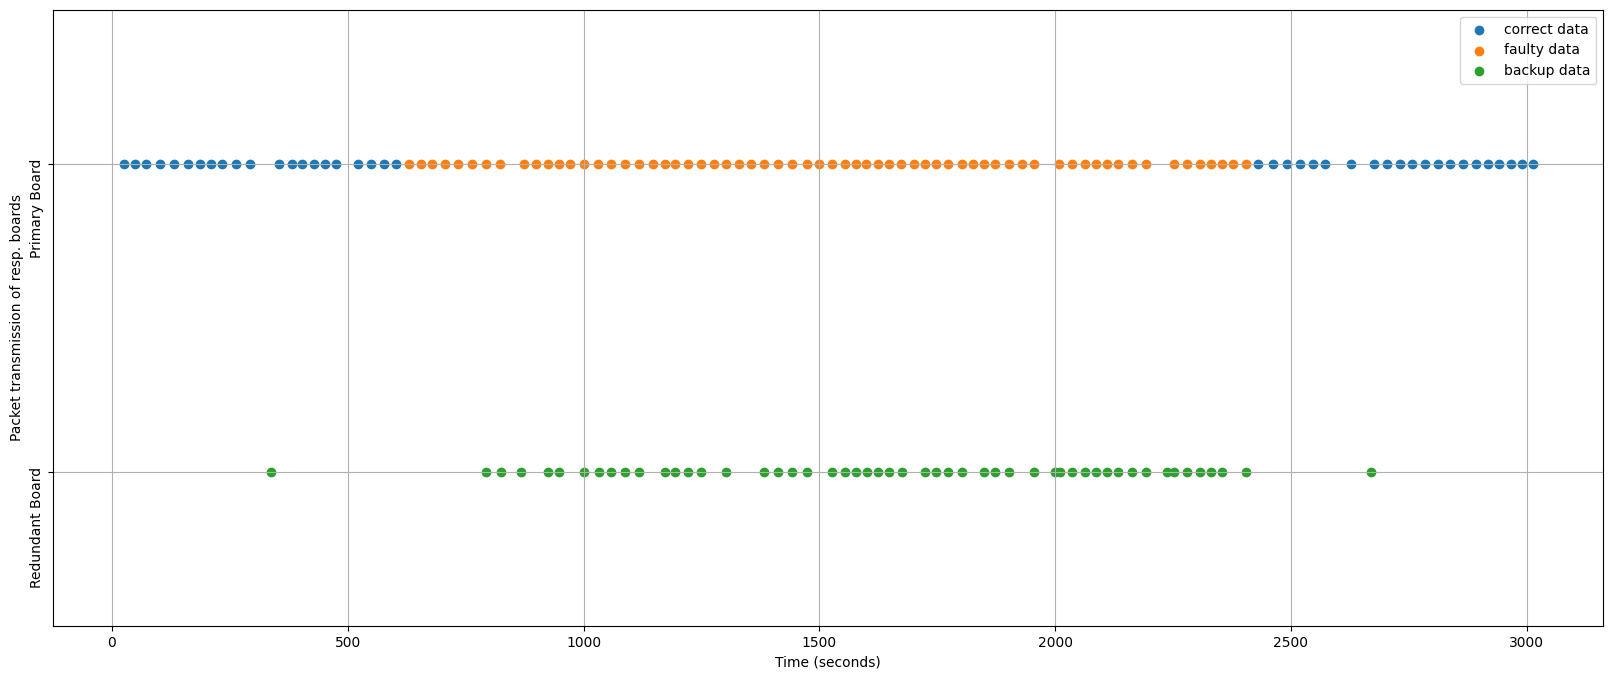

In [136]:
fig = plt.subplots(figsize =(20, 8))

# Set position of bar on X axis
#x_data = np.arange(primary_plotdata[-1][0])

plt.scatter(x_correct_pb, y_correct_pb, label='correct data')
plt.scatter(x_faulty_pb, y_faulty_pb, label='faulty data')
plt.scatter(x_rb, y_rb, label='backup data')
plt.ylim((7,11))
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Packet transmission of resp. boards')
plt.yticks([10,8],['Primary Board', 'Redundant Board'], rotation=90,)
plt.legend()

plt.show()
